# Matplotlib 2 : Making the graph more sensible and pretty

In [132]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [133]:
%matplotlib inline

In [134]:
def f(t):
    """Python function to calculate a enclosed sinusoid"""
    val = 1 / ((t-2.5)**2 + 1) * np.cos(4*np.pi*t)
    return val

t = np.arange(0.0, 5.0, 0.02)

## Modifying axis characteristics

Axis characteristics include position and customizing ticks and spines.

### Ticks

Ticks are the values used to show specific points on the coordinate axis. It can be a number or a string.  
Whenever we plot a graph, the axes adjust and take the default ticks. Matplotlib’s default ticks are generally sufficient in common situations but are in no way optimal for every plot.  
Here, we will see how to customize these ticks as per our need.

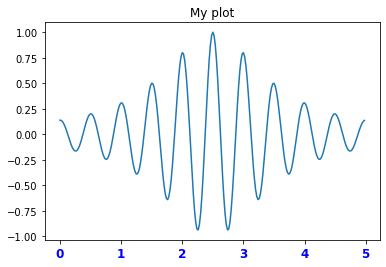

In [135]:
fig = plt.figure() # Initialize the figure and subplot
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, f(t))

# Set the font size via a keyword argument
ax.set_title("My plot", fontsize='large')

# Retrieve an element of a plot and set properties
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize('large')
    tick.set_color('blue')
    tick.set_weight('bold')

In some cases, you may want to specify which tick locations should be shown. This can be done with:

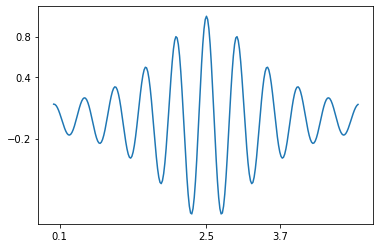

In [136]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([0.1, 2.5, 3.7])
ax.set_yticks([-0.2, 0.4, 0.8])
ax.plot(t, f(t))

It is also easy to specify what the label strings should be explicitly.

[Text(0, 0, 'first'), Text(0, 0, 'second'), Text(0, 0, 'third')]

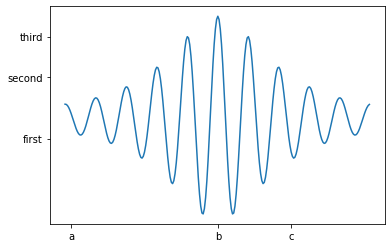

In [137]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, f(t))

ax.set_xticks([0.1, 2.5, 3.7])
ax.set_xticklabels(['a', 'b', 'c'])
ax.set_yticks([-0.2, 0.4, 0.8])
ax.set_yticklabels(['first', 'second', 'third'])

It is best to only use set_ticklabels() when also using set_ticks(), so that you know exactly which ticks you are assigning the labels for.  
This can be used for example if you would like to make a plot as a function of spectral type, or if you want to format the labels in a very specific way.

Text(0, 0.5, 'Number of sources')

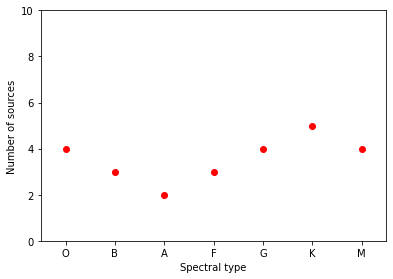

In [138]:
# Initialize figure and axes
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# Define spectral types
spectral_id = [1, 2, 3, 4, 5, 6, 7]
spectral_types = ['O', 'B', 'A', 'F', 'G', 'K', 'M']

# Plot the data
ax.plot(spectral_id, [4, 3, 2, 3, 4, 5, 4], 'ro')

# Set the limits
ax.set_xlim(0.5, 7.5)
ax.set_ylim(0, 10)

# Set the custom ticks on the x-axis
ax.set_xticks(spectral_id)
ax.set_xticklabels(spectral_types)

# Set the axis labels
ax.set_xlabel("Spectral type")
ax.set_ylabel("Number of sources")

Axes 1 shows how to hide ticks and labels on the x axis.  
Axes 2 shows how to only labels, not the ticks.

[]

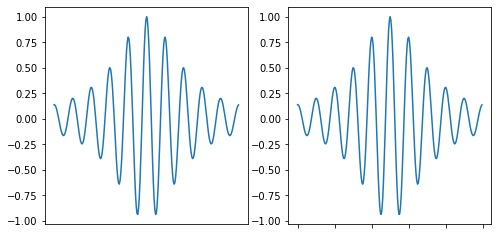

In [139]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(t,f(t))
ax2.plot(t,f(t))

ax1.set_xticks([])
ax2.set_xticklabels('')

### Spines

An axis spine - the line noting the data area boundaries

Spines are the lines connecting the axis tick marks and noting the boundaries of the data area. They can be placed at arbitrary positions.  
See [function:set_position](https://matplotlib.org/api/spines_api.html#matplotlib.spines.Spine.set_position) for more information.

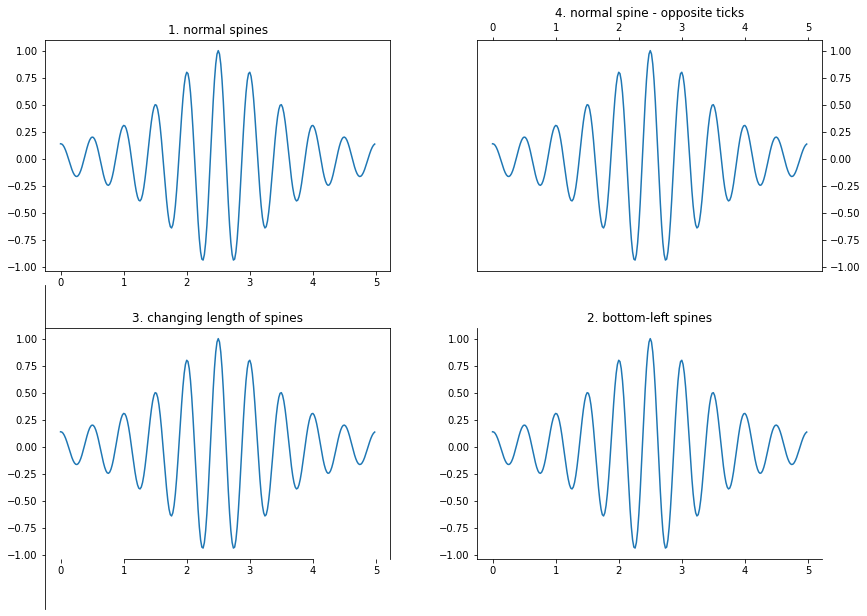

In [140]:
# Constrained layout makes sure the labels don't overlap the axes.
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_axes([0.1, 0.6, 0.4, 0.4])
ax1.plot(t, f(t))
ax1.set_title('1. normal spines')

ax2 = fig.add_axes([0.6, 0.1, 0.4, 0.4])
ax2.plot(t, f(t))
ax2.set_title('2. bottom-left spines')

ax3 = fig.add_axes([0.1, 0.1, 0.4, 0.4])
ax3.plot(t, f(t))
ax3.set_title('3. changing length of spines')

ax4 = fig.add_axes([0.6, 0.6, 0.4, 0.4])
ax4.plot(t, f(t))
ax4.set_title('4. normal spine - opposite ticks')

# Hide the right and top spines
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Only draw spine between the certain ticks
ax3.spines['left'].set_bounds(-1.5, 1.5)
ax3.spines['bottom'].set_bounds(1 ,4)

# Switching tick position
ax4.yaxis.set_ticks_position('right')
ax4.xaxis.set_ticks_position('top')

## Working with text and shapes

This includes making legends, text fields, annotations and common shapes.

### Legend and its positioning

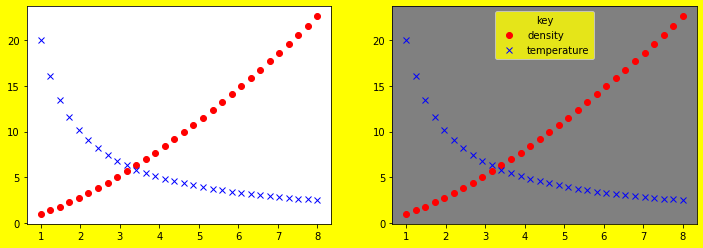

In [141]:
# facecolor is an atribute of figure, axes(plot), legend (any box)

fig = plt.figure(figsize=(12,4), facecolor='yellow')
ax1 = fig.add_subplot(1, 2, 1)

x = np.linspace(1., 8., 30)
ax1.plot(x, x ** 1.5, 'ro', label='density')
ax1.plot(x, 20/x, 'bx', label='temperature')

ax2 = fig.add_subplot(1, 2, 2, facecolor='grey')
ax2.plot(x, x ** 1.5, 'ro', label='density')
ax2.plot(x, 20/x, 'bx', label='temperature')

plt.legend(loc='best', facecolor='yellow', title='key')
# loc can be 'best' or something like 'bottom left' or 'center'

### Colorbar

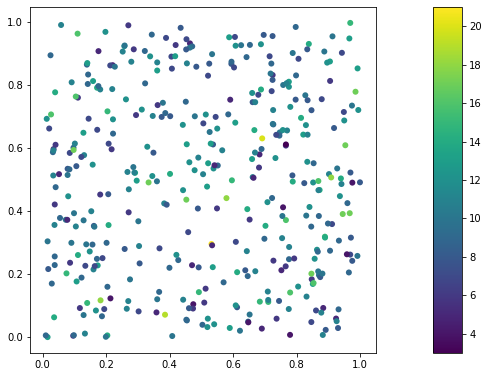

In [142]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_axes([0.1, 0.1, 0.6, 0.8])

x = np.random.random(400)
y = np.random.random(400)
c = np.random.poisson(10., 400)
s = ax.scatter(x, y, c=c, edgecolor='none')

colorbar_ax = fig.add_axes([0.8, 0.1, 0.05, 0.8])
fig.colorbar(s, cax=colorbar_ax) # cax means colorbar axes

Note that colorbar is a __method of the figure__, not the axes. And thus, you should define another axes for it.

### Text fields

Text(0.7, 0.7, 'axes\n2')

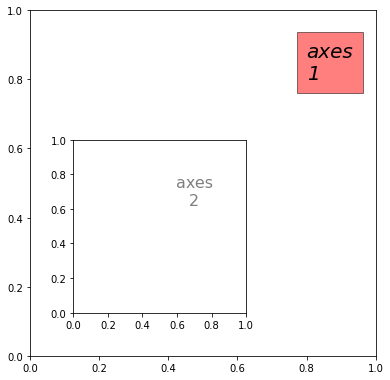

In [143]:
fig = plt.figure(figsize=(6,6))

ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax2 = fig.add_axes([0.2,0.2,0.4,0.4])

ax1.text(0.8, 0.8, 'axes\n1', size=20, style='italic', bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
ax2.text(0.7, 0.7, 'axes\n2', size=16, alpha=0.5, ha='center', va='center')

First two parameters signify (x,y) w.r.t. bottom left corner of the Axes.  
Third parameter is the text to be shown.

'size' is the fontsize.  
'aplha' represents the opacity (0 is transparent, 1 is opaque). Default = 1   
'style' can be 'bold', 'italic' or 'oblique'

'bbox' is a dictonary containing the features of the bounding box of the text.

ha, va (horizontal and vertical alignment) Default : ha = 'left', 'va' = 'baseline'  
'ha' causing centering of text horizontally (see '2' in 2nd Text)
'ha' and 'va' also shift the origin of the text field to its center  
(see bottom-left corner of 1st Text corresponds to (0.8, 0.8) of Axes 1 while center of 2nd Text corresponds to (0.7, 0.7) of Axes 2)

### Annotations

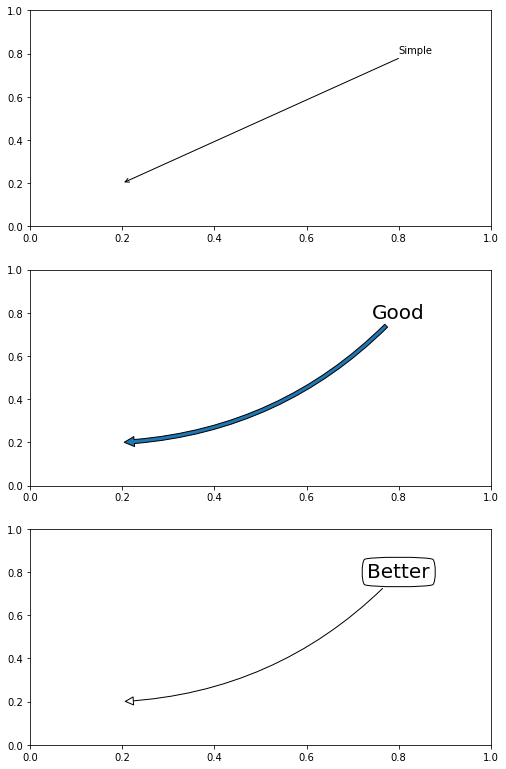

In [144]:
fig = plt.figure(figsize=(8,12))
ax1 = fig.add_axes([0.1, 0.7, 0.8, 0.25])
ax2 = fig.add_axes([0.1, 0.4, 0.8, 0.25])
ax3 = fig.add_axes([0.1, 0.1, 0.8, 0.25])

ax1.annotate('Simple',
            xy=(0.2, 0.2), xycoords='data',
            xytext=(0.8, 0.8), textcoords='data',
            arrowprops=dict(arrowstyle='->',
                            connectionstyle='arc3'),
            )

ax2.annotate('Good',
            xy=(0.2, 0.2), xycoords='data',
            xytext=(0.8, 0.8), textcoords='data',
            size=20, va='center', ha='center',
            arrowprops=dict(arrowstyle='simple',
                            connectionstyle='arc3,rad=-0.2'),
            )

ax3.annotate('Better',
                  xy=(0.2, 0.2), xycoords='data',
                  xytext=(0.8, 0.8), textcoords='data',
                  size=20, va='center', ha='center',
                  bbox=dict(boxstyle='round4', fc='w'),
                  arrowprops=dict(arrowstyle='-|>',
                                  connectionstyle='arc3,rad=-0.2',
                                  fc='w'),
                  )

plt.show()

In [145]:
# Ellipses// Patches and 
# e1 = patches.Ellipse((xcenter, ycenter), width, height, angle=angle, linewidth=2, fill=False, zorder=2)
# https://matplotlib.org/3.1.1/gallery/units/ellipse_with_units.html#sphx-glr-gallery-units-ellipse-with-units-py